# Fire.ipynb - iPython file for Module 10.3, "Spreading of Fire"

Introduction to Computational Science: Modeling and Simulation for the Sciences, 2nd Edition Angela B. Shiflet and George W. Shiflet Wofford College © 2014 by Princeton University Press

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *
from random import *

matplotlib.rc('animation', html='html5')

# Development of Fire Program

## constants
Grid-site values:
	EMPTY (0)     - empty
	TREE (1)         - non-burning tree
	BURNING (2) - burning tree
    
probTree = probability of grid site occupied by tree (value 1); i.e., tree density

probBurning = probability that a tree is burning (value 2); i.e., fraction of burning trees

probImmune = probability of immunity from catching fire

probLightning = probability of lightning

In [3]:
global EMPTY, TREE, BURNING
EMPTY = 0
TREE = 1
BURNING = 2

## initialization

## Function to return an n-by-n grid of values (EMPTY (no tree), TREE (non-burning tree), or BURNING (burning tree)), where probTree is the probability of a tree and  probBurning is the probability that the tree is burning
Pre:	n is the size (number of rows or columns) of the square grid and is positive.
	probTree is the probability that a site is initially occupied by tree.  
	probBurning is the probability that a tree is burning initially. 
    
Post:	 A grid as described above was returned.

In [4]:
def initForest(n, probTree, probBurning):
    forest = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            if (random() < probTree):
                if (random() < probBurning):
                    forest[i, j] = BURNING
                else:
                    forest[i, j] = TREE
            else:
                forest[i, j] = EMPTY
    return forest

## Function to return the value of a site at the next time step 
An empty cell remains empty. A burning cell becomes empty. If a neighbor to the north, east, south, or west of  a tree is burning, then the tree does not burn with a probability of probImmune. If a tree has no burning neighbors, it is hit by lightning and burns with a probability of probLightning * (1 - probImmune).

In [5]:
def spread(site, N, E, S, W, probLightning, probImmune):
    if (site == EMPTY):
        newSite = EMPTY
    else:
        if (site == BURNING):
            newSite = EMPTY
        else:
            if (N == BURNING or E == BURNING or S == BURNING or W == BURNING):
                if (random() < probImmune):
                    newSite = TREE
                else:
                    newSite = BURNING
            else:
                if (random() < probLightning * (1 - probImmune)):
                    newSite = BURNING
                else:
                    newSite = TREE
    return newSite

## Function to accept a grid and to return a grid extended one cell in each direction with periodic boundary conditions
Pre:	lat is a grid.

Post:	A grid extended one cell in each direction with periodic boundary conditions was returned.

In [6]:
def reflectingLat(lat):
    latNS = np.row_stack((lat[0], lat, lat[-1]))
    return np.column_stack((latNS[:,0], latNS, latNS[:,-1]))

## Function to apply a function parameter to a matrix extended by 1 cell in each direction
Function returns a matrix of applications of function spread[site, N, E, S, W, probLightning, probImmune] to each element (site) of extended matrix latExtended except for the first and last rows and columns

In [7]:
def applyExtended(latExt, probLightning, probImmune):
    n = latExt.shape[0] - 2
    newLat = np.zeros((n, n))    
    
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            E = latExt[i, j + 1]
            S = latExt[i + 1, j]
            W = latExt[i, j - 1]
            newLat[i - 1, j - 1] = spread(site, N, E, S, W, probLightning, probImmune)
    return newLat

## Function to return a list of grids in a simulation of the spread of fire in a forest, where a cell value of EMPTY indicates the cell is empty; TREE, the cell contains a non-burning tree; and BURNING, a burning tree
Pre:
	n is the size (number of rows or columns) of the square grid and is positive.   
	probTree is the probability that a site is initially occupied by tree.      
	probBurning is the probability that a tree is burning initially.     
	probLightning is the probability of lightning hitting a site.    
	probImmune is the probability of a tree being immune from catching fire.      
	t is the number of time steps.    
	spread is the function for the updating rules at each grid point.
    
Post:	
	A list of the initial grid and the grid at each time step was returned.

In [8]:
def fire(n, probTree, probBurning, probLightning, probImmune, t):
    forest  = initForest( n, probTree, probBurning )
    
    # Perform simulation
    grids = np.zeros((t + 1, n, n))
    grids[0, :, :] = forest
    for i in range(1, t + 1):
        forestExtended = reflectingLat(forest)
        forest = applyExtended(forestExtended, probLightning, probImmune)
        grids[i, :, :] = forest
    return grids

## Set up formatting for the movie files

In [9]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

## Function to display a list of grids with cell values colored as follows:  EMPTY -> yellow, TREE -> green, BURNING -> burnt orange

In [10]:
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] == BURNING):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1                
    return colorGrid

## Run program for several simulations
After each simulation, display animations of bacteria grids and nutrient grids with code below.

In [11]:
seed(1)
grids = fire(15, 0.8, 0.001, 0.001, 0.3, 20)

In [12]:
grids = fire(20, 0.5, 0.5,0.5, 0.5, 5)

In [13]:
grids = fire(20,0.3,0.01,0,0,15)

In [24]:
grids = fire(20,0.7,0.2,0.01,0.3,25)

## display a list of grids with cell values in color

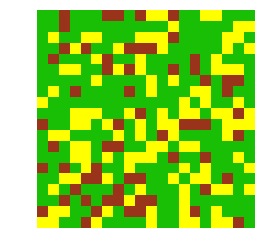

In [25]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=50, blit=False)
plt.show()

# To save the animation, use the command, placed before HTML: 
grid_ani.save('Fire.mp4', writer=writer)

HTML(grid_ani.to_html5_video())